# Introduction

This notebook experiments with Total Variance denoising of the form

$\min_y [ E(x,y) + \lambda V(y) ]$

with 

$V(y) = \sum_{$

In [4]:
import torch
from torch import nn, optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from skimage import data

# Results

In [113]:
def tv_loss(y):
    d1 = y[..., 1:, :] - y[..., :-1, :]
    d2 = y[..., :, 1:] - y[..., :, :-1]
    a,b = d1.abs(), d2.abs()
    loss = a.sum() + b.sum()
    return loss

noisy = torch.tensor(data.camera() / 255)
#noisy += 0.15*torch.randn_like(noisy)
if len(noisy.shape) < 3:
    noisy = noisy.unsqueeze(0)
clean = noisy.clone()
clean.requires_grad=True

n_iter = 250
alpha = 1e-3
optimizer = optim.Adam([clean])
for i in range(n_iter):
    optimizer.zero_grad()
    l2_term = F.mse_loss(clean, noisy)
    tv_term = tv_loss(clean)
    loss = l2_term + alpha*tv_term
    if i % 50 == 0:
        print('iter=%d, loss = %.2f' % (i, loss.item()))
    loss.backward()
    optimizer.step()

iter=0, loss = 13.57
iter=50, loss = 6.71
iter=100, loss = 4.38
iter=150, loss = 3.39
iter=200, loss = 2.90


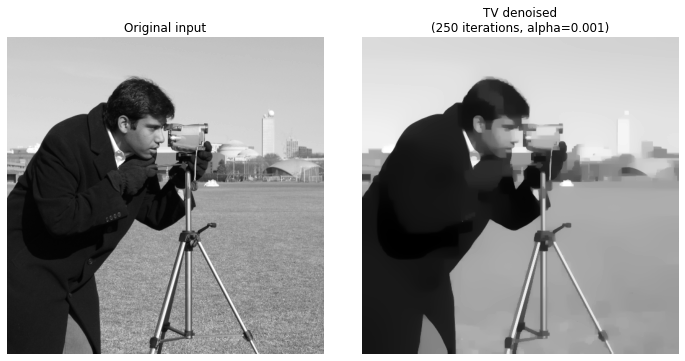

In [114]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(noisy.squeeze(), cmap='gray')
plt.title('Original input')
plt.axis('off')
plt.subplot(1,2,2)
plt.title('TV denoised\n(%d iterations, alpha=%.3f)' % (n_iter, alpha))
plt.imshow(clean.detach().squeeze(), cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()